# Used Car Price Prediction

## 1) Problem statement.

* This dataset comprises used cars sold on cardehko.com in India as well as important features of these cars.
* If user can predict the price of the car based on input features.
* Prediction results can be used to give new seller the price suggestion based on market condition.

## 2) Data Collection.
* The Dataset is collected from scrapping from cardheko webiste
* The data consists of 13 column and 15411 rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("cardekho_dataset.csv")


# Exploratory Data Analysis 

The cells below automatically detect a `pandas.DataFrame` present in the notebook's global scope and generate several exploratory plots:

1. **Missing value fractions** (top columns)
2. **Numeric distributions** (hist + KDE) for up to 6 numeric features
3. **Correlation heatmap** of numeric features
4. **Top absolute correlations with the target** (if a `y`/`y_train` vector is available and aligned)
5. **Boxplots** for the 6 most variable numeric features
6. **Categorical feature counts** for up to 3 categorical columns (top 20 levels)
7. **Scatter matrix** for up to 4 top numeric features by variance

> Tip: Ensure your dataset is loaded into a `pandas.DataFrame` (e.g., `df`) **before** running these cells.


Using DataFrame 'df' with shape (15411, 14)


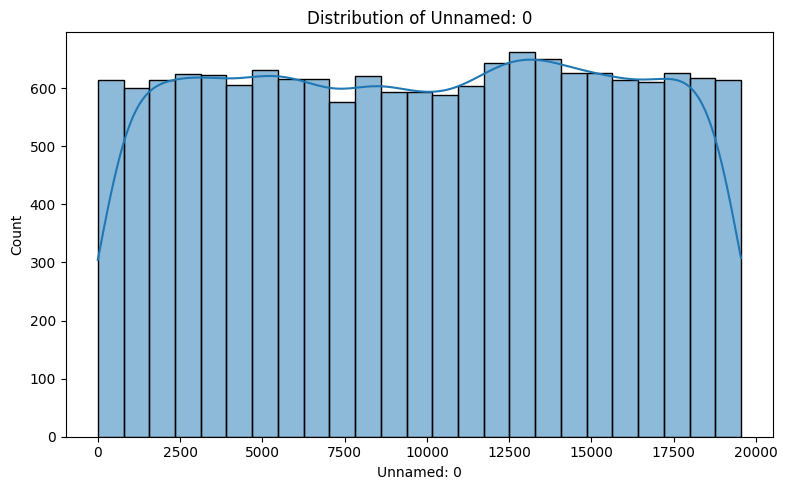

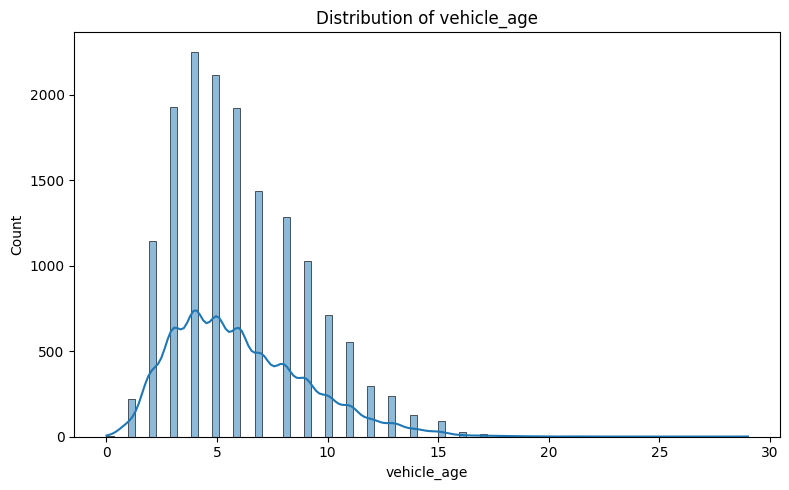

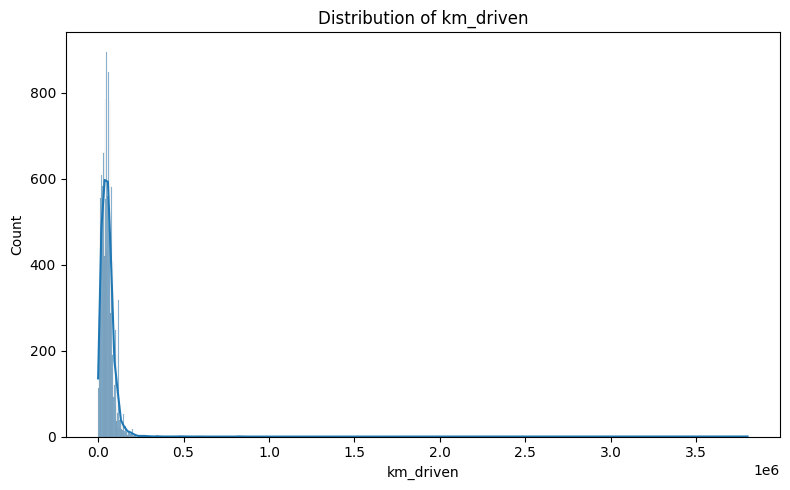

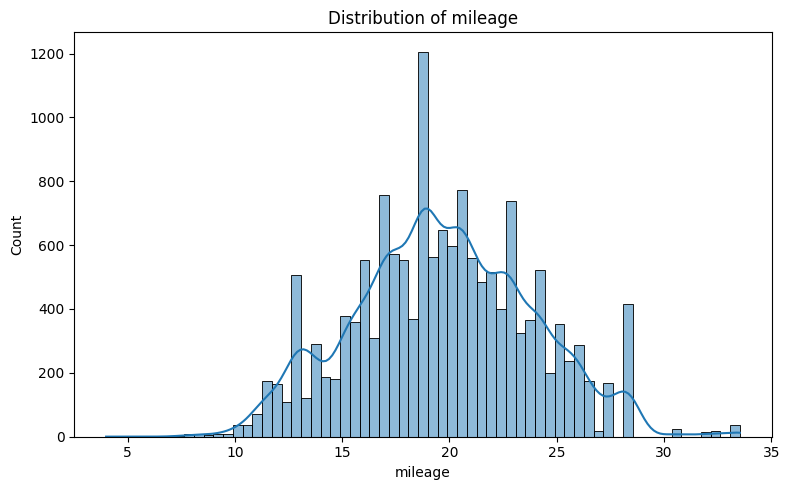

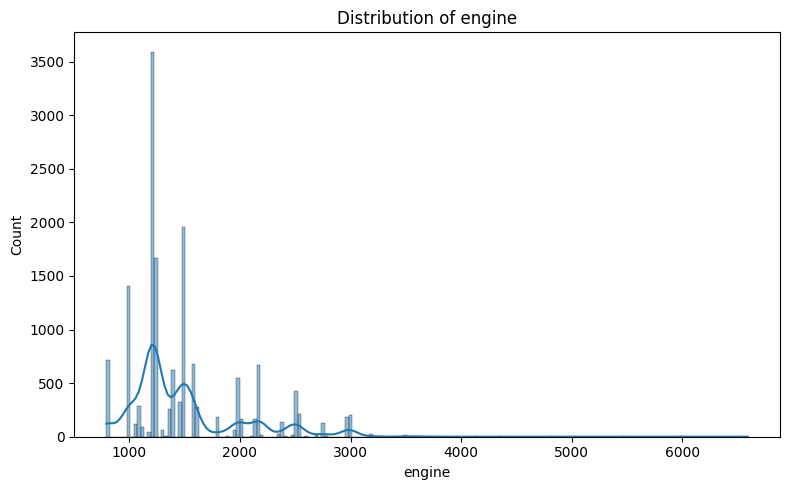

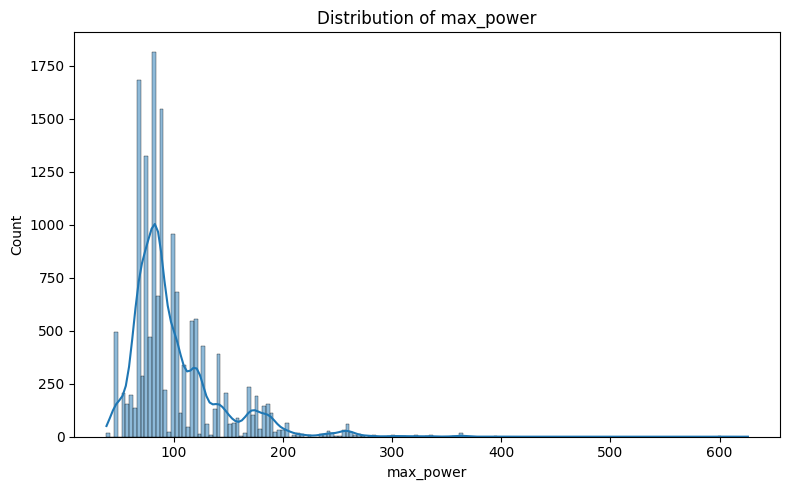

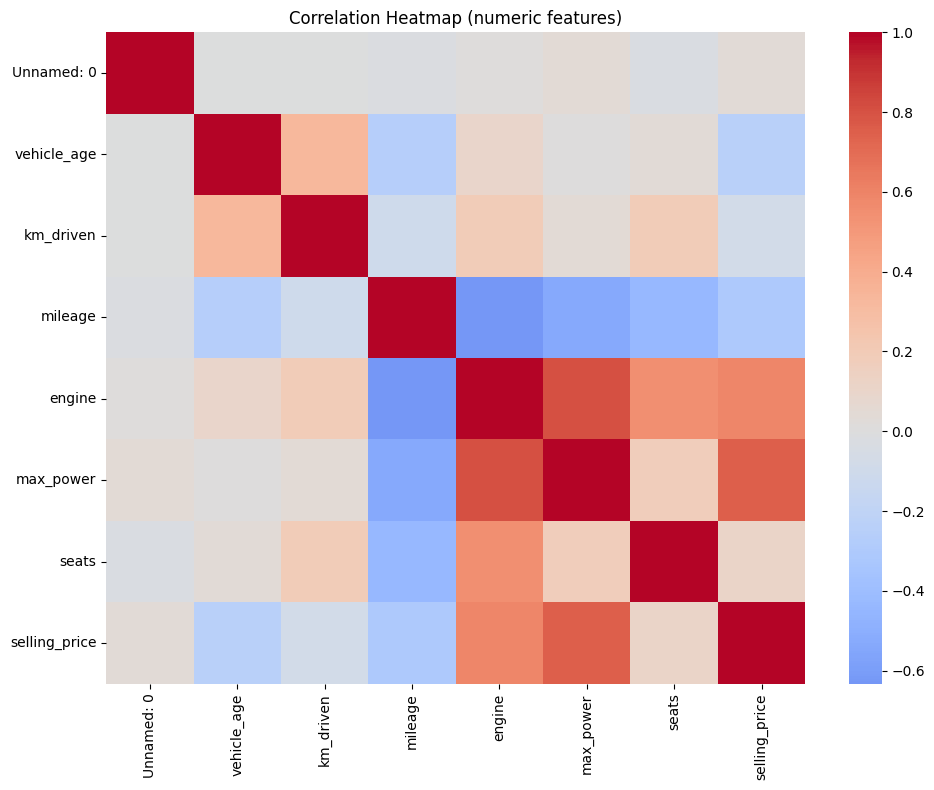

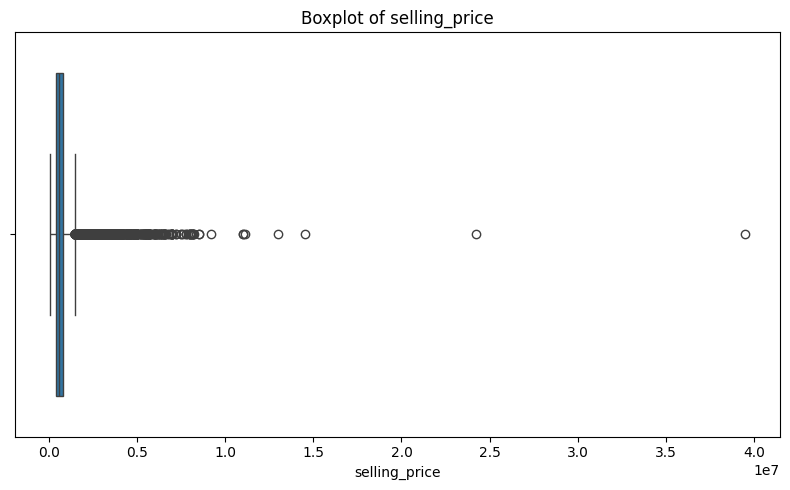

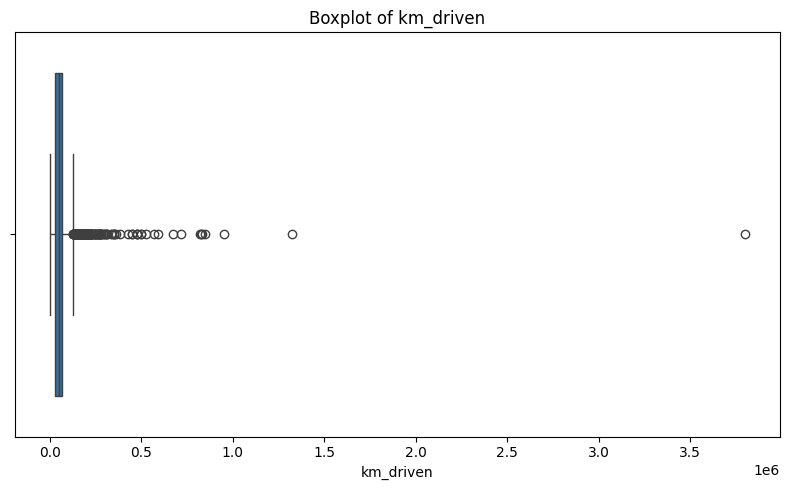

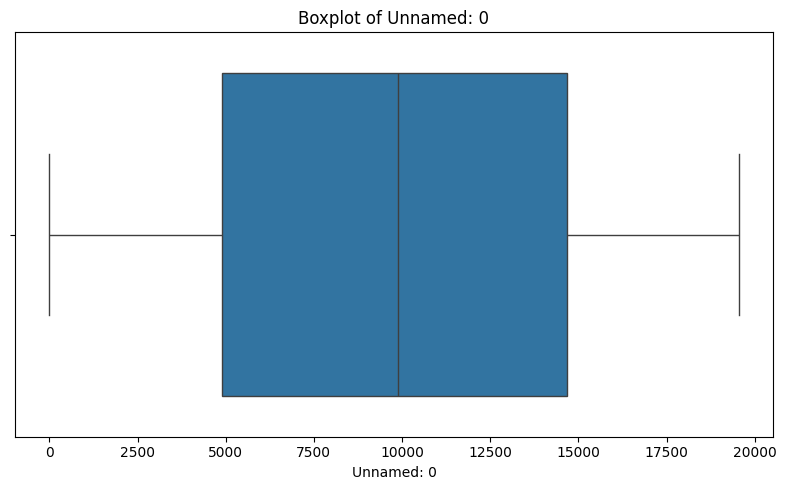

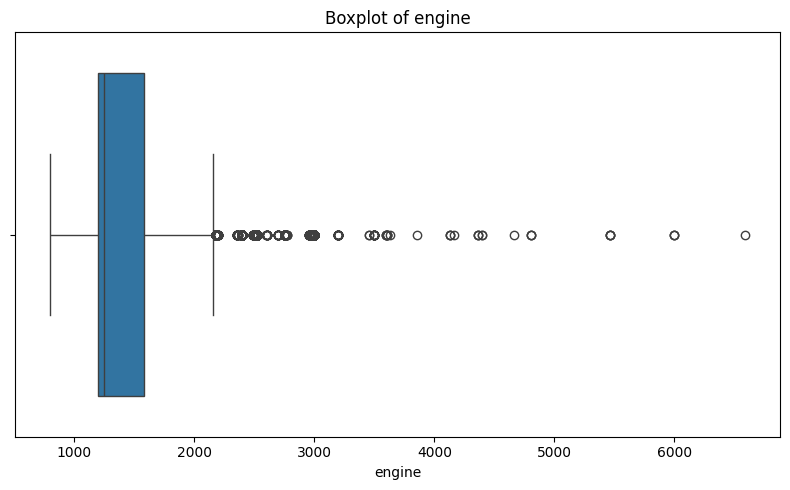

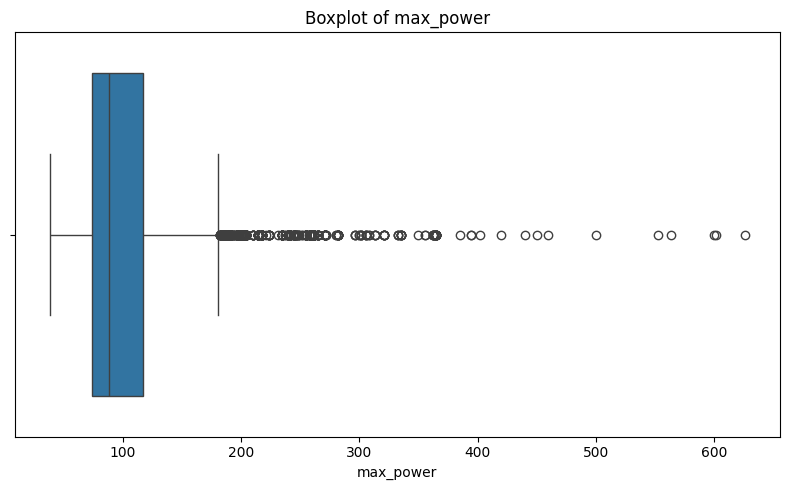

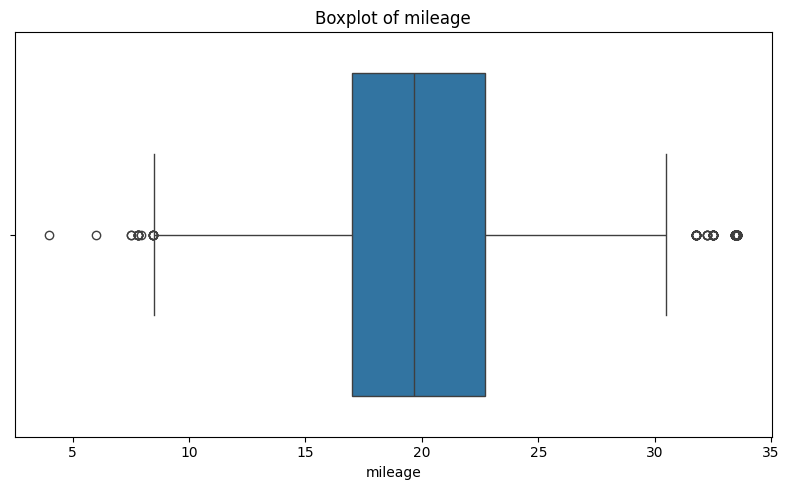

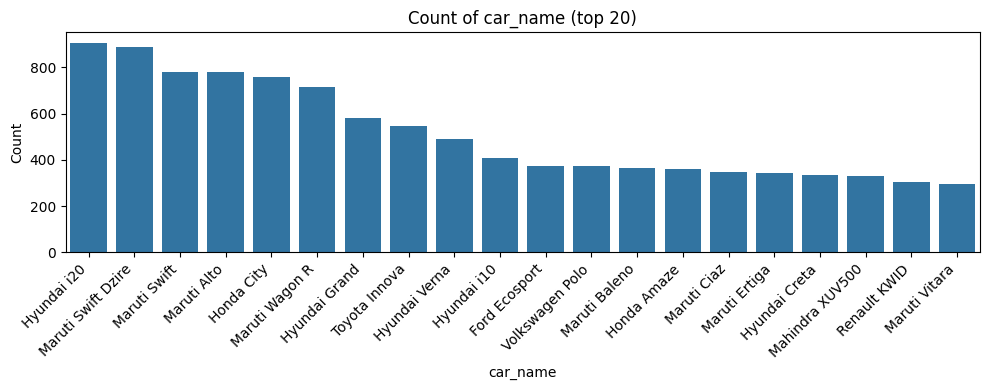

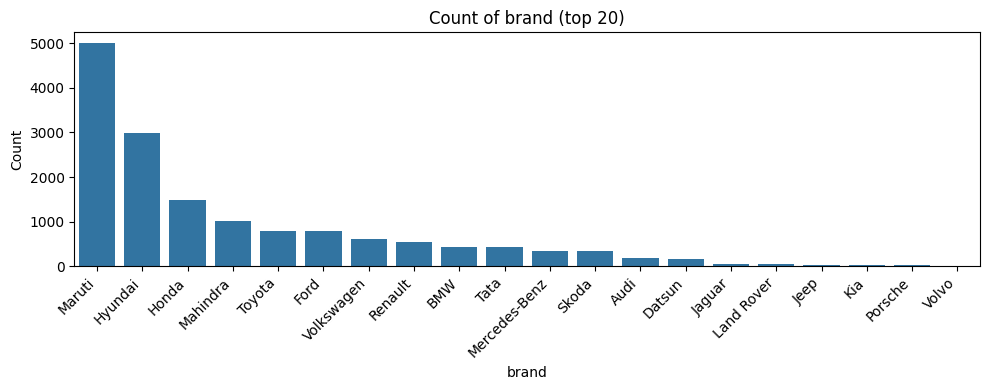

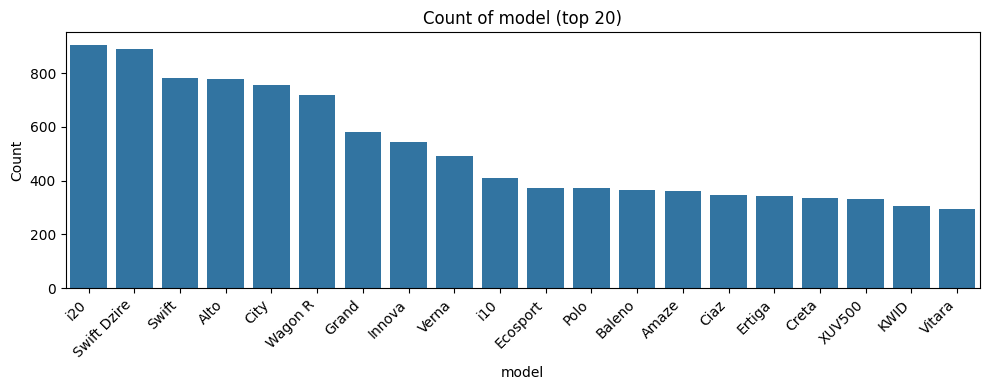

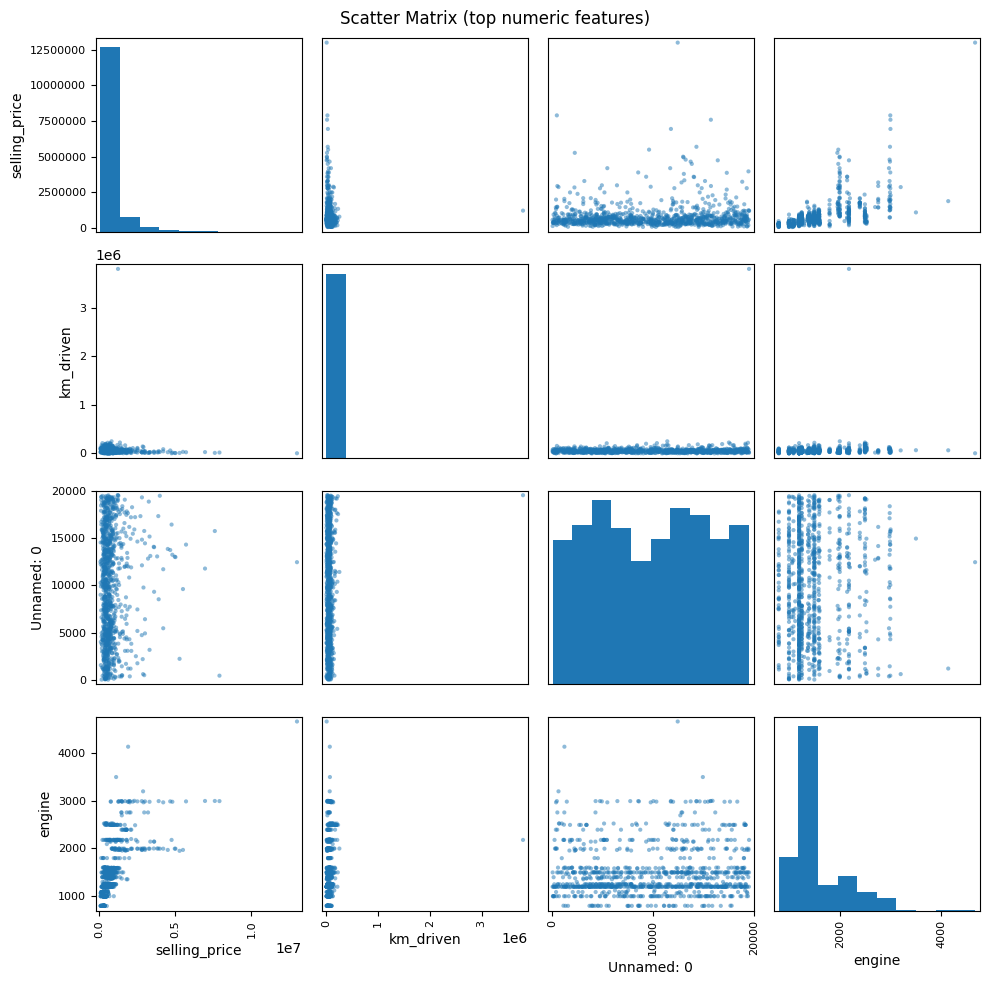

In [3]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

plt.rcParams["figure.figsize"] = (8, 5)


_df_candidates = {k: v for k, v in globals().items() if isinstance(v, pd.DataFrame) and len(v) > 0}

if len(_df_candidates) == 0:
    raise ValueError(
        "EDA: No pandas DataFrame found in the global scope. "
        "Please ensure your dataset is loaded (e.g., df = pd.read_csv(...)) before running this cell."
    )


df_name, df = max(_df_candidates.items(), key=lambda kv: kv[1].shape[0])
print(f"Using DataFrame '{df_name}' with shape {df.shape}")


missing_frac = df.isna().mean().sort_values(ascending=False)
if (missing_frac > 0).any():
    plt.figure()
    missing_frac.head(30).plot(kind="bar")
    plt.title("Missing Value Fraction (top 30 columns)")
    plt.ylabel("Fraction missing")
    plt.tight_layout()
    plt.show()


num_cols = [c for c in df.columns if is_numeric_dtype(df[c])]
cat_cols = [c for c in df.columns if (df[c].dtype == "object") or pd.api.types.is_categorical_dtype(df[c])]


for col in num_cols[:6]:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

#Correlation heatmap (numeric)
if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap (numeric features)")
    plt.tight_layout()
    plt.show()

#Top abs correlations with target if y / y_train available and aligned
target_candidates = []
for cand in ["y", "y_train"]:
    if cand in globals():
        try:
            t = pd.Series(globals()[cand]).squeeze()
            target_candidates.append((cand, t))
        except Exception:
            pass

if target_candidates:
    tname, t = target_candidates[0]
    if len(t) == len(df):
       
        t = pd.to_numeric(t, errors="coerce")
        corr_with_t = df[num_cols].apply(pd.to_numeric, errors="coerce").corrwith(t).abs().sort_values(ascending=False)
        corr_with_t = corr_with_t.head(15).dropna()
        if not corr_with_t.empty:
            plt.figure()
            corr_with_t.plot(kind="bar")
            plt.title(f"|Correlation| with target '{tname}' (top 15)")
            plt.ylabel("|corr|")
            plt.tight_layout()
            plt.show()

#Boxplots for top 6 numeric by variance
if len(num_cols) > 0:
    variances = pd.Series({c: df[c].var() for c in num_cols}).sort_values(ascending=False)
    top_box = variances.head(6).index.tolist()
    for col in top_box:
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()

#Categorical counts for up to 3 categorical columns (top 20 levels)
for col in cat_cols[:3]:
    vc = df[col].astype(str).value_counts().head(20)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Count of {col} (top 20)")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

#Scatter matrix for up to 4 top numeric features
from pandas.plotting import scatter_matrix

if len(num_cols) >= 2:
    # choose by variance again
    pair_cols = variances.head(4).index.tolist() if len(num_cols) > 1 else num_cols[:2]
    sm_df = df[pair_cols].dropna()
    if len(sm_df) > 1000:
        sm_df = sm_df.sample(1000, random_state=42)
    axarr = scatter_matrix(sm_df, diagonal="hist", figsize=(10, 10))
    plt.suptitle("Scatter Matrix (top numeric features)")
    plt.tight_layout()
    plt.show()


In [4]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


## Data Cleaning
### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

In [5]:
## Check Null Values
##Check features with nan value
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [6]:
## Remove Unnecessary Columns
df.drop('car_name', axis=1, inplace=True)
df.drop('brand', axis=1, inplace=True)

In [7]:
df.head()

,Unnamed: 0,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [8]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [9]:
## Getting All Different Types OF Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical Features : 8
Num of Categorical Features : 4
Num of Discrete Features : 2
Num of Continuous Features : 6


In [10]:
## Indpendent and dependent features
from sklearn.model_selection import train_test_split
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [11]:
X.head()

,Unnamed: 0,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


## Feature Encoding and Scaling
**One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [12]:
len(df['model'].unique())

120

In [13]:
df['model'].value_counts()

model
i20             906
Swift Dzire     890
Swift           781
Alto            778
City            757
               ... 
Altroz            1
C                 1
Ghost             1
Quattroporte      1
Gurkha            1
Name: count, Length: 120, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['model']=le.fit_transform(X['model'])

In [15]:
X.head()

,Unnamed: 0,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,0,7,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,1,54,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,2,118,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,3,7,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [16]:
len(df['seller_type'].unique()),len(df['fuel_type'].unique()),len(df['transmission_type'].unique())

(3, 5, 2)

In [17]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['seller_type','fuel_type','transmission_type']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
        ("StandardScaler", numeric_transformer, num_features)
        
    ],remainder='passthrough'
    
)

In [18]:
X=preprocessor.fit_transform(X)

In [19]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.738694,-1.519714,0.983562,1.247335,-0.000276,-1.324259,-1.263352,-0.403022
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.738516,-0.225693,-0.343933,-0.690016,-0.192071,-0.554718,-0.432571,-0.403022
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.738339,1.536377,1.647309,0.084924,-0.647583,-0.554718,-0.479113,-0.403022
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.738162,-1.519714,0.983562,-0.360667,0.292211,-0.936610,-0.779312,-0.403022
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.737985,-0.666211,-0.012060,-0.496281,0.735736,0.022918,-0.046502,-0.403022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.723327,1.508844,0.983562,-0.869744,0.026096,-0.767733,-0.757204,-0.403022
15407,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.723859,-0.556082,-1.339555,-0.728763,-0.527711,-0.216964,-0.220803,2.073444
15408,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.724036,0.407551,-0.012060,0.220539,0.344954,0.022918,0.068225,-0.403022
15409,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.724213,1.426247,-0.343933,72.541850,-0.887326,1.329794,0.917158,2.073444


In [20]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((12328, 15), (3083, 15))

In [21]:
X_train

array([[ 0.        ,  0.        ,  1.        , ...,  1.75390551,
         2.66249771, -0.40302241],
       [ 1.        ,  0.        ,  0.        , ..., -0.55087963,
        -0.38602844, -0.40302241],
       [ 0.        ,  0.        ,  1.        , ...,  0.89033072,
         3.27453006, -0.40302241],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.9366097 ,
        -0.78070786, -0.40302241],
       [ 0.        ,  0.        ,  0.        , ..., -0.55471774,
        -0.43582879, -0.40302241],
       [ 1.        ,  0.        ,  0.        , ..., -0.04616815,
         0.06194201, -0.40302241]], shape=(12328, 15))

 # Final Post-Cleaning & Scaling EDA

# Instead of plain text metrics, we now provide visuals, plots to summarize model results and dataset characteristics.

# **Included Plots:**
# 1. Distribution of scaled features  
# 2. Correlation heatmap  
# 3. Actual vs Predicted (Test set)  
# 4. Residuals distribution  
# 5. Residuals vs Predicted scatter  
# 6. Feature importance (Random Forest)  
# 7. Prediction error plot 

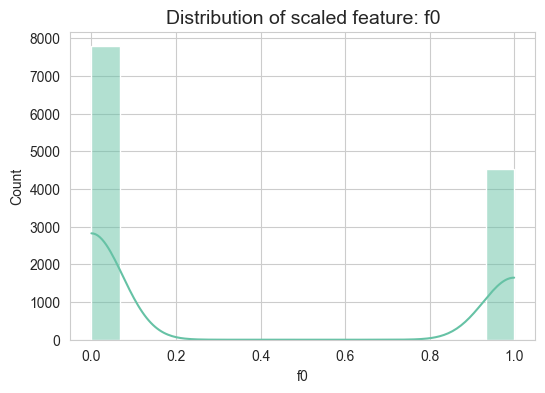

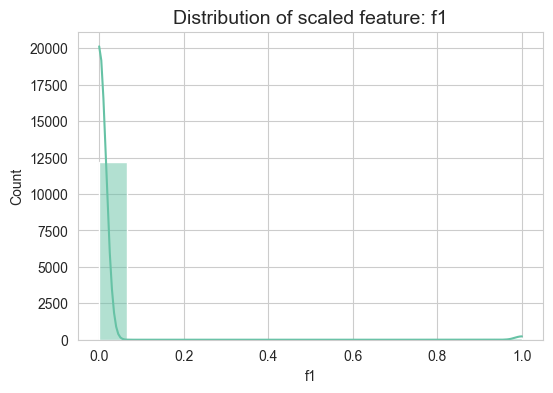

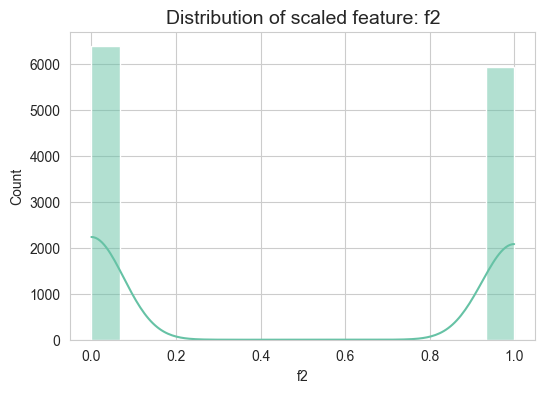

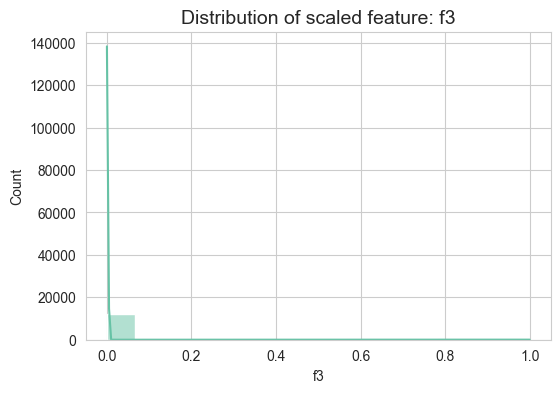

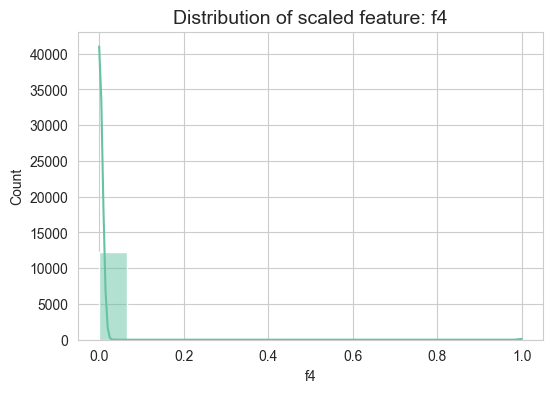

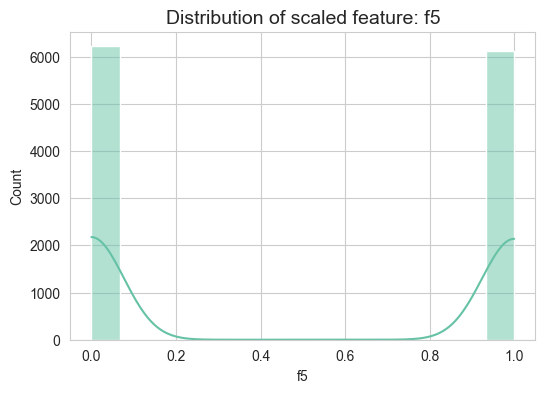

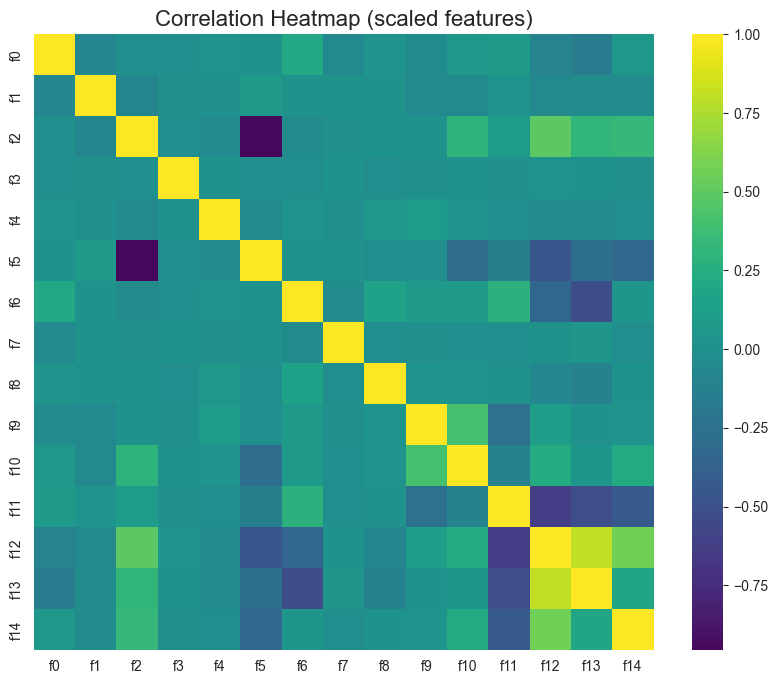

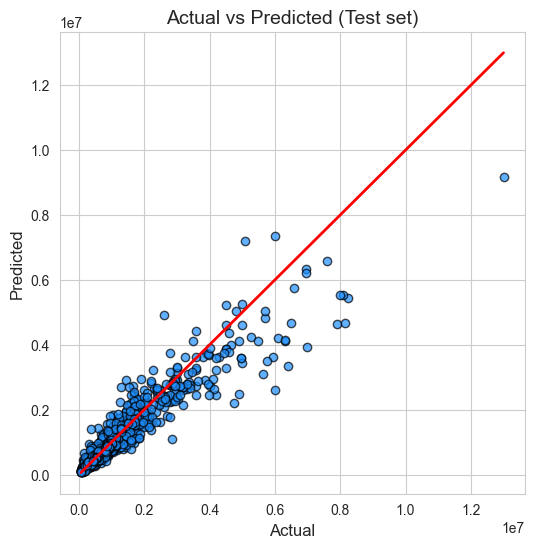

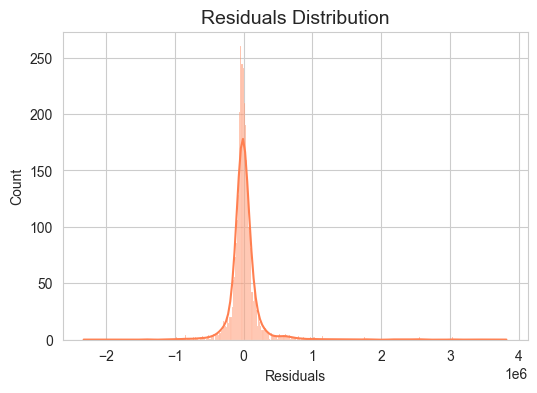

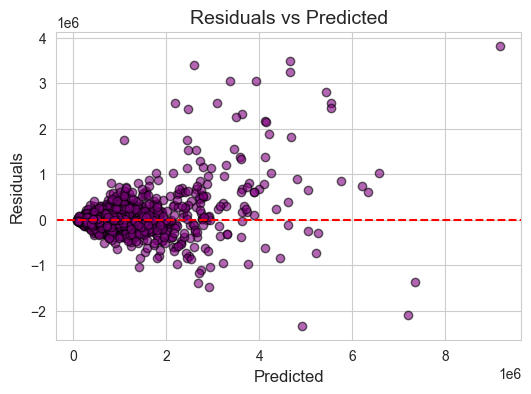

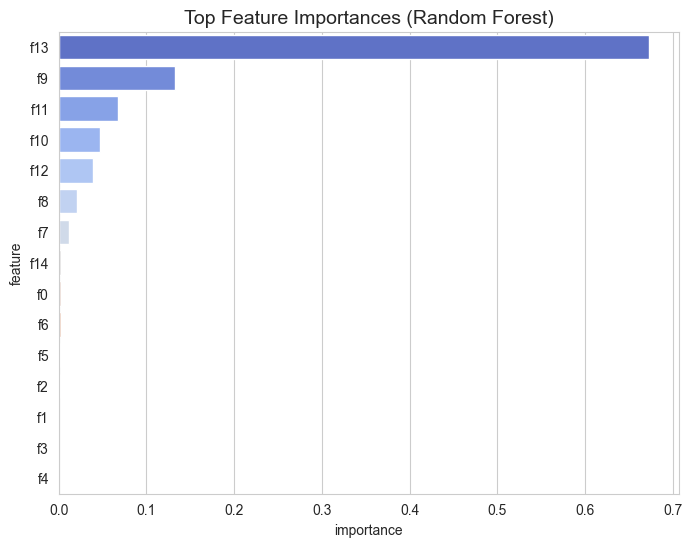

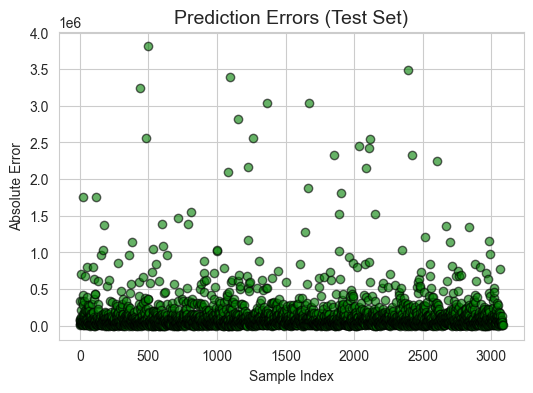

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

sns.set_style("whitegrid")
sns.set_palette("Set2")

# Convert X_train back to DataFrame if scaled numpy array
if 'X_train' in globals():
    if not isinstance(X_train, pd.DataFrame):
        X_scaled = pd.DataFrame(X_train, columns=[f"f{i}" for i in range(X_train.shape[1])])
    else:
        X_scaled = X_train.copy()

# # 1) Distribution of scaled features (first 6)
for col in X_scaled.columns[:6]:
    plt.figure(figsize=(6,4))
    sns.histplot(X_scaled[col], kde=True, color=sns.color_palette("Set2")[0])
    plt.title(f"Distribution of scaled feature: {col}", fontsize=14)
    plt.show()

# # 2) Correlation heatmap (scaled features)
if X_scaled.shape[1] > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(X_scaled.corr(), cmap="viridis", center=0)
    plt.title("Correlation Heatmap (scaled features)", fontsize=16)
    plt.show()

# Use last trained model for predictions
if 'y_test' in globals() and 'model' in globals():
    y_pred = model.predict(X_test)

    # 3) Actual vs Predicted
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.7, c="dodgerblue", edgecolor="k")
    plt.xlabel("Actual", fontsize=12)
    plt.ylabel("Predicted", fontsize=12)
    plt.title("Actual vs Predicted (Test set)", fontsize=14)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", lw=2)
    plt.show()

    # 4) Residual distribution
    residuals = y_test - y_pred
    plt.figure(figsize=(6,4))
    sns.histplot(residuals, kde=True, color="coral")
    plt.title("Residuals Distribution", fontsize=14)
    plt.xlabel("Residuals")
    plt.show()

    # 5) Residuals vs Predicted
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, residuals, alpha=0.6, c="purple", edgecolor="k")
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Residuals", fontsize=12)
    plt.title("Residuals vs Predicted", fontsize=14)
    plt.show()

    # 6) Feature importance (Random Forest)
    rf_model = None
    for mname, m in models.items():
        if isinstance(m, RandomForestRegressor):
            rf_model = m
            break

    if rf_model is not None and hasattr(rf_model, "feature_importances_"):
        importances = rf_model.feature_importances_
        feat_df = pd.DataFrame({"feature": X_scaled.columns, "importance": importances})
        feat_df = feat_df.sort_values("importance", ascending=False).head(15)
        plt.figure(figsize=(8,6))
        sns.barplot(x="importance", y="feature", data=feat_df, palette="coolwarm")
        plt.title("Top Feature Importances (Random Forest)", fontsize=14)
        plt.show()

    # 7) Prediction error scatter plot
    errors = np.abs(y_test - y_pred)
    plt.figure(figsize=(6,4))
    plt.scatter(range(len(errors)), errors, alpha=0.6, c="green", edgecolor="k")
    plt.title("Prediction Errors (Test Set)", fontsize=14)
    plt.xlabel("Sample Index")
    plt.ylabel("Absolute Error")
    plt.show()

## Model Training And Model Selection

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [24]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [26]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 553850.0494
- Mean Absolute Error: 268104.1303
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502582.0834
- Mean Absolute Error: 279686.6479
- R2 Score: 0.6645


Lasso
Model performance for Training set
- Root Mean Squared Error: 553850.0538
- Mean Absolute Error: 268101.7491
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502581.1494
- Mean Absolute Error: 279682.7929
- R2 Score: 0.6645


Ridge
Model performance for Training set
- Root Mean Squared Error: 553850.6941
- Mean Absolute Error: 268061.4421
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502572.3576
- Mean Absolute Error: 279625.1576
- R2 Score: 0.6645


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 335460.8145
- Mean 

In [27]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}


In [28]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params)
                   
                   ]

In [29]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 2}
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


In [30]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features=1.0, max_depth=None, 
                                                     n_jobs=-1),
     "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=10, n_jobs=-1)
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 142713.8083
- Mean Absolute Error: 35932.1739
- R2 Score: 0.9749
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 236926.6454
- Mean Absolute Error: 98552.6419
- R2 Score: 0.9254


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 376668.3802
- Mean Absolute Error: 111121.5769
- R2 Score: 0.8251
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 295441.3065
- Mean Absolute Error: 127369.3886
- R2 Score: 0.8840


